In [21]:
# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

In [11]:
# we will read the dataset that we created in the previous exercise
df = pd.read_csv("DSDPartners_Data.csv", encoding='ISO-8859-1')
df.head()

,CustStorItemTriadID,BaseorderID,Createdate,RecDeliveryDate,CategoryID,OaMasterDistributorID,ConversionFactor,InventoryChange,ActualScans,ForecastedScans,...,ConversionUnits,MaxDeliveredQty,ConversionResidual,Previous2DelDate,MaxScanDate,MaxShipDate,TwoOrderAgo,QtyShippedTwoOrderAgo,Reviewed,IncInAnom
0,13761530,1867926,5/1/20,5/7/20,1,5,0.75,12,0,13,...,9,27,1,4/30/20,4/29/20,4/27/20,9,0,1,1
1,13761530,1889852,5/7/20,5/11/20,1,5,0.75,3,0,18,...,9,27,6,5/4/20,5/5/20,5/4/20,18,13,1,1
2,13761530,1899415,5/8/20,5/14/20,1,5,0.75,5,0,11,...,9,27,0,5/7/20,5/6/20,5/4/20,9,0,1,1
3,13761530,1953002,5/21/20,5/25/20,1,5,0.75,5,0,16,...,9,27,0,5/18/20,5/19/20,5/18/20,18,12,1,1
4,13761530,2048503,6/11/20,6/15/20,1,5,0.75,6,0,15,...,9,27,5,6/8/20,6/9/20,6/8/20,18,9,1,1


In [12]:
#also try Operator Adjustments as potential target
target = 'PropOrderQty'

In [17]:
y = np.asarray(df[target])
#y = np.reshape(y,(y.shape[0],1))
X = df.drop(['CustStorItemTriadID','BaseorderID','Createdate','ModelUsed','RecDeliveryDate',
             'ConversionFactor','Previous2DelDate','MaxScanDate','MaxShipDate','Reviewed','IncInAnom'],axis = 1).drop(target, axis=1).fillna(0)
#df.isna().sum()

In [18]:
#Establish training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=314)

len(X_train), len(X_test), len(y_test), len(y_train)

(247801, 247801, 247801, 247801)

In [19]:
# Create model

model = Sequential()
model.add(Dense(X.shape[1], activation="relu", input_dim=X.shape[1]))
model.add(Dense(X.shape[1]*.75, activation="relu"))
model.add(Dense(1))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X_train)
PredValSet = model.predict(X_test)

Epoch 1/100
24781/24781 - 18s - loss: 2.5573 - val_loss: 2.0732
Epoch 2/100
24781/24781 - 18s - loss: 1.9856 - val_loss: 1.9271
Epoch 3/100
24781/24781 - 18s - loss: 1.8841 - val_loss: 1.9093
Epoch 4/100
24781/24781 - 18s - loss: 1.8450 - val_loss: 2.0891
Epoch 5/100
24781/24781 - 18s - loss: 1.8193 - val_loss: 1.9111
Epoch 6/100
24781/24781 - 18s - loss: 1.7888 - val_loss: 1.9539
Epoch 7/100
24781/24781 - 18s - loss: 1.7759 - val_loss: 1.7974
Epoch 8/100
24781/24781 - 18s - loss: 1.7722 - val_loss: 1.7739
Epoch 9/100
24781/24781 - 18s - loss: 1.7599 - val_loss: 1.7861
Epoch 10/100
24781/24781 - 18s - loss: 1.7556 - val_loss: 1.7780
Epoch 11/100
24781/24781 - 17s - loss: 1.7414 - val_loss: 1.7941
Epoch 12/100
24781/24781 - 17s - loss: 1.7325 - val_loss: 1.8144
Epoch 13/100
24781/24781 - 17s - loss: 1.7339 - val_loss: 1.7896
Epoch 14/100
24781/24781 - 17s - loss: 1.7287 - val_loss: 1.7674
Epoch 15/100
24781/24781 - 17s - loss: 1.7233 - val_loss: 1.7612
Epoch 16/100
24781/24781 - 17s - l

In [22]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, PredValSet), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, PredValSet), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, PredValSet), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, PredValSet), 2)) 
print("R2 score =", round(sm.r2_score(y_test, PredValSet), 3))

Mean absolute error = 0.45
Mean squared error = 1.72
Median absolute error = 0.08
Explain variance score = 0.96
R2 score = 0.959


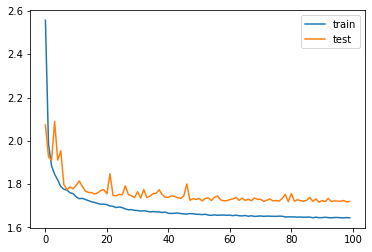

In [23]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [24]:
#Neural Network Model Accuracy
r_squared = r2_score(y_test,PredValSet)
#add RMSE,MSE, MAE

In [25]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [26]:
r_squared,adjusted_r_squared

(0.9590419216203184, 0.9590405166368394)

In [28]:
#Use the below code to see what percent where our predictions fall within 3, 4 or 5 off from actual
#As of Sunday night 98.6, 98.0 and 96.8 percent of predictions are +- 3,4 or 5 of actual.
#Biggest improvement is that the model gets it exactly right 83% of the time with new features, compared to 70% prior.
y_test_vals =np.reshape(y_test,(y_test.shape[0],))
Preds =  np.reshape(PredValSet,(PredValSet.shape[0],))
compare = pd.DataFrame(np.array([y_test_vals, Preds]))

                                 
compare = np.transpose(compare)
compare.to_csv(r'compare.csv', index = False)